<a href="https://colab.research.google.com/github/Max-JI64/Kakao_Tech_Bootcamp/blob/main/Daily_class/25_10_23_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 활성화 함수

## 시그모이드

In [1]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    s = sigmoid(x)
    return s * (1 - s)

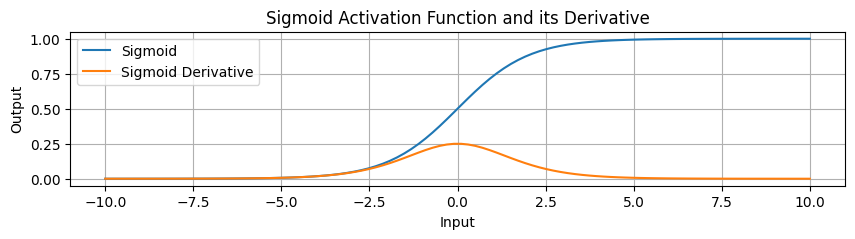

In [2]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-10, 10, 100)
y = sigmoid(x)

y_derivative = sigmoid_derivative(x)

plt.figure(figsize=(10, 2))

plt.plot(x, y, label='Sigmoid')
plt.plot(x, y_derivative, label='Sigmoid Derivative')
plt.title('Sigmoid Activation Function and its Derivative')
plt.xlabel('Input')
plt.ylabel('Output')
plt.legend()
plt.grid()
plt.show()


## 하이퍼볼릭 탄젠트

In [3]:
def tanh(x):
    return np.tanh(x)

def tanh_derivative(x):
    return 1 - np.tanh(x)**2

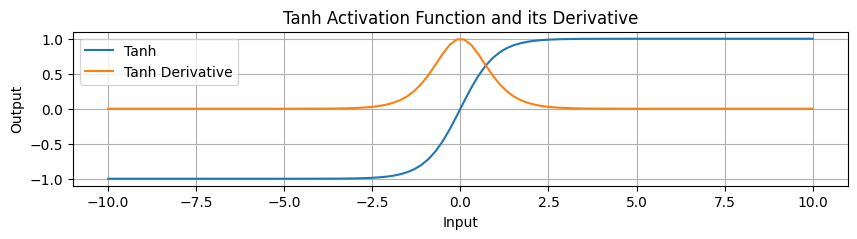

In [4]:
# Plotting tanh and its derivative
x = np.linspace(-10, 10, 100)
y = tanh(x)
y_derivative = tanh_derivative(x)
plt.figure(figsize=(10, 2))
plt.plot(x, y, label='Tanh')
plt.plot(x, y_derivative, label='Tanh Derivative')
plt.title('Tanh Activation Function and its Derivative')
plt.xlabel('Input')
plt.ylabel('Output')
plt.legend()
plt.grid()
plt.show()


## 렐루

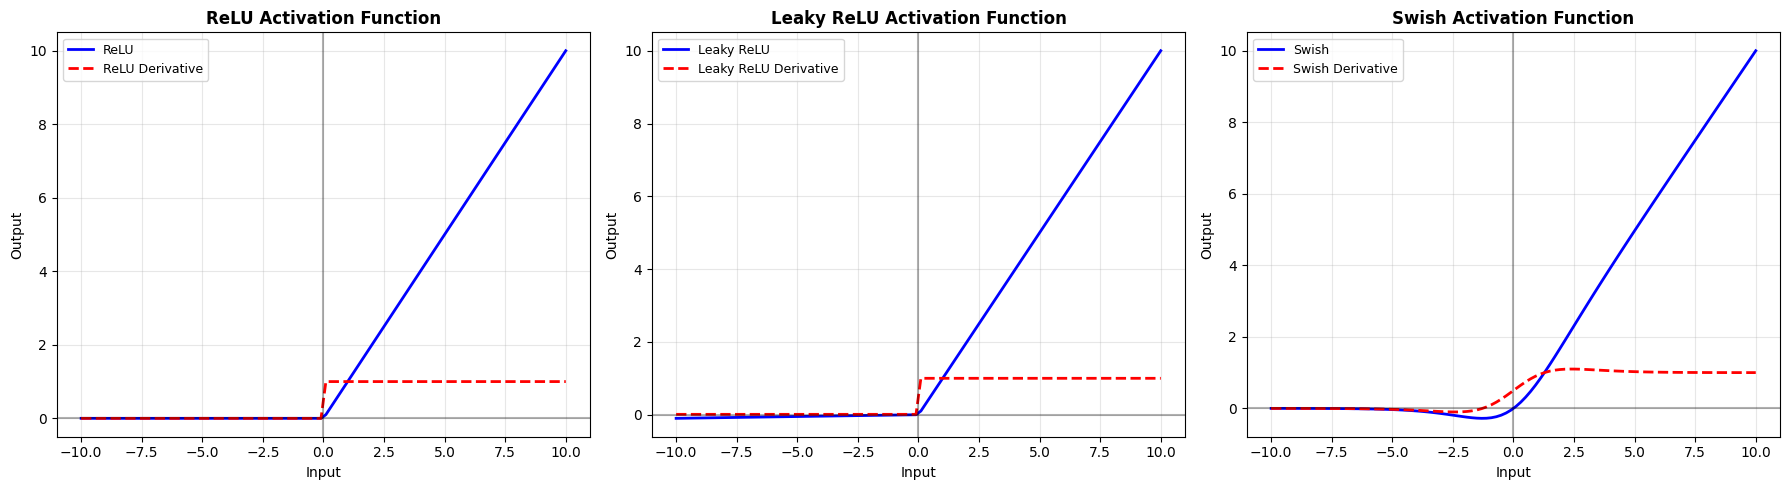

In [5]:
# Define activation functions
def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return np.where(x > 0, 1, 0)

def leaky_relu(x, alpha=0.01):
    return np.where(x > 0, x, alpha * x)

def leaky_relu_derivative(x, alpha=0.01):
    return np.where(x > 0, 1, alpha)

def swish(x, beta=1):
    return x * sigmoid(beta * x)

def swish_derivative(x, beta=1):
    s = sigmoid(beta * x)
    return s + beta * x * s * (1 - s)

# Generate data
x = np.linspace(-10, 10, 100)

# Create 1x3 subplot layout
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# ReLU plot
y_relu = relu(x)
y_relu_derivative = relu_derivative(x)
axes[0].plot(x, y_relu, 'b-', linewidth=2, label='ReLU')
axes[0].plot(x, y_relu_derivative, 'r--', linewidth=2, label='ReLU Derivative')
axes[0].axhline(y=0, color='k', linestyle='-', alpha=0.3)
axes[0].axvline(x=0, color='k', linestyle='-', alpha=0.3)
axes[0].set_title('ReLU Activation Function', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Input', fontsize=10)
axes[0].set_ylabel('Output', fontsize=10)
axes[0].legend(fontsize=9)
axes[0].grid(True, alpha=0.3)

# Leaky ReLU plot
y_leaky = leaky_relu(x)
y_leaky_derivative = leaky_relu_derivative(x)
axes[1].plot(x, y_leaky, 'b-', linewidth=2, label='Leaky ReLU')
axes[1].plot(x, y_leaky_derivative, 'r--', linewidth=2, label='Leaky ReLU Derivative')
axes[1].axhline(y=0, color='k', linestyle='-', alpha=0.3)
axes[1].axvline(x=0, color='k', linestyle='-', alpha=0.3)
axes[1].set_title('Leaky ReLU Activation Function', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Input', fontsize=10)
axes[1].set_ylabel('Output', fontsize=10)
axes[1].legend(fontsize=9)
axes[1].grid(True, alpha=0.3)

# Swish plot
y_swish = swish(x)
y_swish_derivative = swish_derivative(x)
axes[2].plot(x, y_swish, 'b-', linewidth=2, label='Swish')
axes[2].plot(x, y_swish_derivative, 'r--', linewidth=2, label='Swish Derivative')
axes[2].axhline(y=0, color='k', linestyle='-', alpha=0.3)
axes[2].axvline(x=0, color='k', linestyle='-', alpha=0.3)
axes[2].set_title('Swish Activation Function', fontsize=12, fontweight='bold')
axes[2].set_xlabel('Input', fontsize=10)
axes[2].set_ylabel('Output', fontsize=10)
axes[2].legend(fontsize=9)
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()